<a href="https://colab.research.google.com/github/hansonnguy/MAT-421/blob/main/Module_G_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW 5 - Hanson Nguyen

# **21.1 Numerical Integration Problem Statement**


---

Similar to numerical differentiation, we can use numerical grids, or an evenly spaced set of points, defined over some domain to discretize functions. For integration, we can define an interval $[a,b]$ where $b>a$ without loss of generalization. We can discretize this interval into $n+1$ points with a spacing of $h = \frac{b-a}{n}$ and $x_i$ nodes, where $x_0 = a$ and $x_n = b$. An interval $[x_i, x_{i+1}]$ is considered to be a subinterval. Methods that use numerical integration techniques have historically been referred to as quadratures.

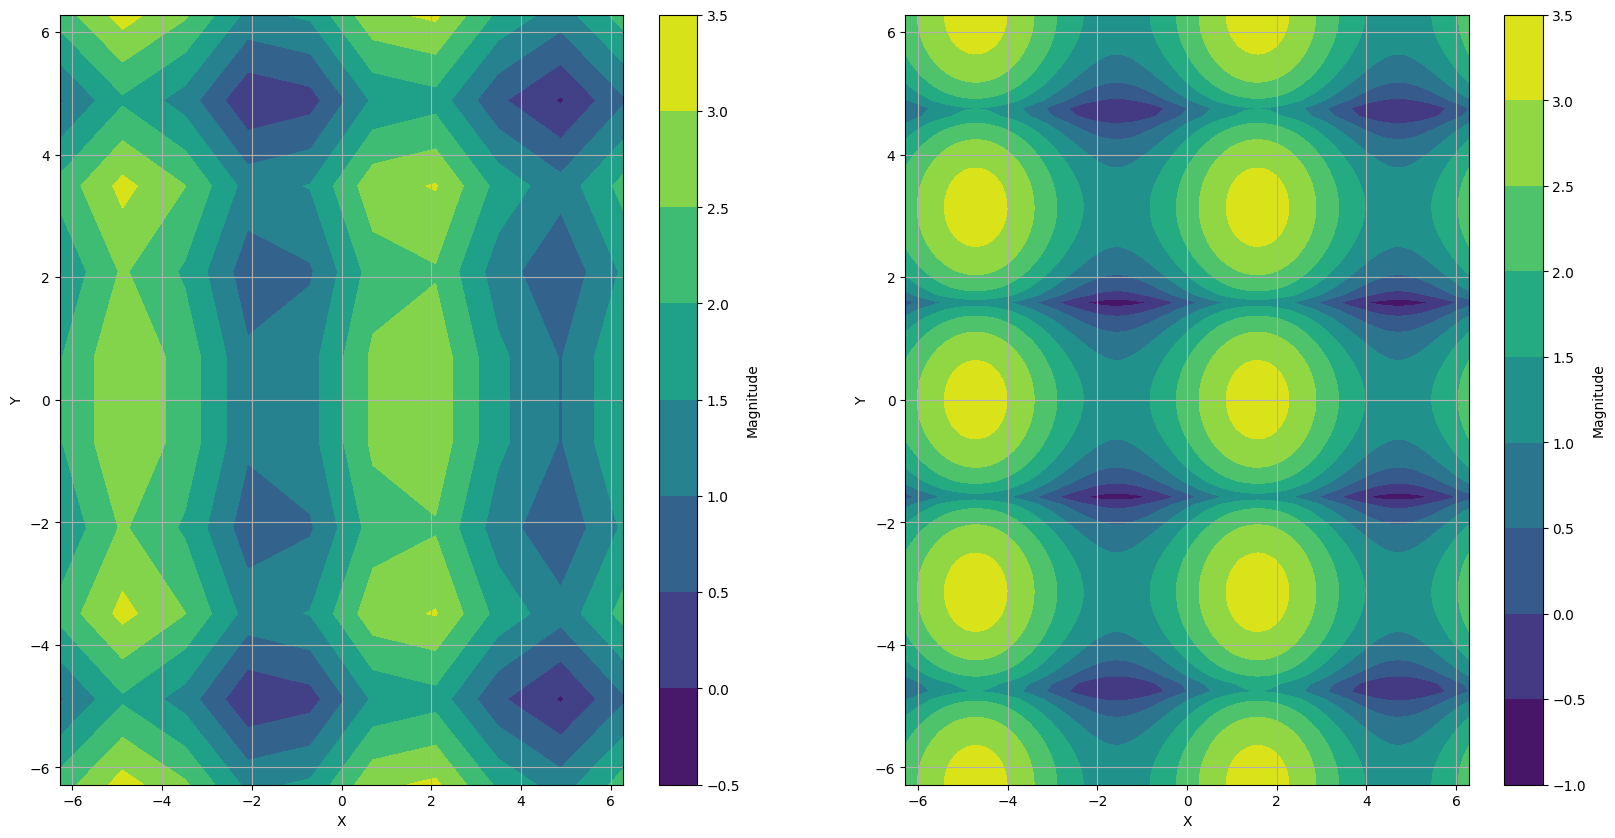

In [ ]:
# Here is a demonstration of a 2-D meshgrid, which is a discretized grid.

import numpy as np
import matplotlib.pyplot as plt

# large spacing
x = np.linspace(-2*np.pi, 2*np.pi, 10)
y = np.linspace(-2*np.pi, 2*np.pi, 10)
X,Y = np.meshgrid(x,y)
Z = (1*np.sin(X)) + np.sqrt(abs((5*np.cos(Y))))


# Plot the numerical grid
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.contourf(X, Y, Z, cmap='viridis')
plt.colorbar(label='Magnitude')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

# small spacing
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = np.linspace(-2*np.pi, 2*np.pi, 100)
X,Y = np.meshgrid(x,y)
Z = (1*np.sin(X)) + np.sqrt(abs((5*np.cos(Y))))

plt.subplot(1,2,2)
plt.contourf(X, Y, Z, cmap='viridis')
plt.colorbar(label='Magnitude')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

plt.show()

# **21.2 Riemanns Integral**


---

The Riemann Integral approximation sums the area of $n$ rectangles, each defined by $area = hf(x_i)$ for a total integral of $\int_a^bf(x)dx\approx\sum_{i=1}^nhf(x_i)$, for a right-hand Riemann sum and $\int_a^bf(x)dx\approx\sum_{i=0}^{n-1}hf(x_i)$ for a left-hand Riemann sum. To characterize the error, We can write out the Taylor series and obtain $\int_{x_i}^{x_{i+1}}f(x)dx \approx hf(x_i) + \mathcal{O}(h^2)$. The error is $n\mathcal{O}(h^2)$, which becomes $\mathcal{O}(h)$ since $h = \frac{b-a}{n}$ The midpoint rule is $\int_a^bf(x)dx\approx\sum_{i=1}^nh(f\frac{x_i + x_{i+1}}{2})$. The Taylor expansion gives $\int_{x_i}^{x_{i+1}}f(x)dx \approx hf(x_i) + \mathcal{O}(h^3)$.

In [ ]:
import numpy as np

a = 0
b = np.pi
n = 15
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.square(np.cos(x))

I_riemannL = h * sum(f[:n-1])
err_riemannL = 2 - I_riemannL

I_riemannR = h * sum(f[1::])
err_riemannR = 2 - I_riemannR

I_mid = h * sum(np.sin((x[:n-1] \
        + x[1:])/2))
err_mid = 2 - I_mid

print('Left Hand Riemanns Approx: ', I_riemannL)
print('Left Hand Riemanns Approx Error: ', err_riemannL)

print('Right Hand Riemanns Approx: ', I_riemannR)
print('Right Hand Riemanns Approx Error: ', err_riemannR)

print('Midpoint Riemanns Approx: ', I_mid)
print('Midpoint Riemanns Approx Error: ', err_mid)

Left Hand Riemanns Approx:  1.5707963267948966
Left Hand Riemanns Approx Error:  0.42920367320510344
Right Hand Riemanns Approx:  1.5707963267948966
Right Hand Riemanns Approx Error:  0.42920367320510344
Midpoint Riemanns Approx:  2.0042024315762794
Midpoint Riemanns Approx Error:  -0.0042024315762794195


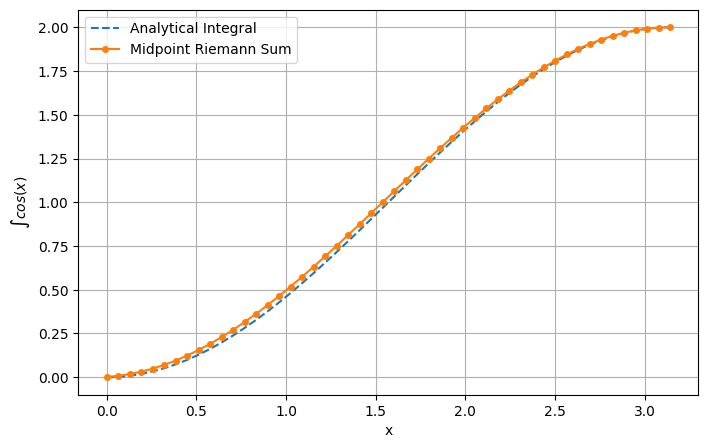

In [43]:
# Here, we can calculate the integral numerically and compare to an analytical solution

import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return np.sin(x)

# Midpoint Riemann Sum
def midpoint_riemann_sum(f, a, b, n):
    h = (b - a) / n
    x_midpoints = np.linspace(a + h/2, b-h/2, n)
    return np.cumsum(f(x_midpoints)*h)

a, b = 0, np.pi
n = 50

x = np.linspace(a, b, n)
riemann_integral = midpoint_riemann_sum(f, a, b, n)

analytical_integral = lambda x: -np.cos(x) + 1 # shift +1 to match analytical solution
y_analytical = analytical_integral(x)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(x, y_analytical, label="Analytical Integral", linestyle="dashed")
plt.plot(x, riemann_integral, label="Midpoint Riemann Sum", marker="o", markersize=4)
plt.xlabel("x")
plt.ylabel("$\int{cos(x)}$")
plt.legend()
plt.grid()
plt.show()


# **20.3 Trapezoid Rule**


---
For the Trapezoidal Integral approximation, we can sum the area of $n$ trapezoids, each defined by $area = h\frac{f(x_i)+f(x_{i+1})}{2}$ for a total integral of $\int_a^bf(x)dx\approx\sum_{i=0}^{n-1}h\frac{f(x_i)+f(x_{i+1})}{2}$ To characterize the error, We can write out the Taylor series and obtain $\int_{x_i}^{x_{i+1}}f(x)dx \approx h\frac{f(x_i)+f(x_{i+1})}{2} + \mathcal{O}(h^3)$. , which becomes $\mathcal{O}(h^2)$ for the whole integral.

In [ ]:
import numpy as np

a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_trap = h * (sum(f[:n-1]) + sum(f[1::]))/2
err_trap = 2 - I_trap

print('Trapezoidal Approx: ', I_trap)
print('Trapezoidal Approx Error: ', err_trap)

Trapezoidal Riemanns Approx:  1.9835235375094546
Trapezoidal Riemanns Approx Error:  0.01647646249054535


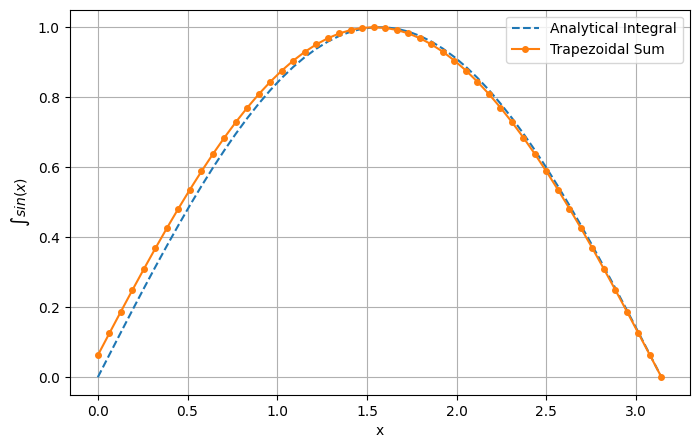

In [ ]:
# Here, we can calculate the integral numerically and compare to an analytical solution

import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return np.cos(x)

# Trapezoidal Sum
def trap_sum(f, a, b, n):
    h = (b - a) / n
    x_points_1 = np.linspace(a, b-h, n)
    x_points_2 = np.linspace(a+h, b, n)
    return np.cumsum((f(x_points_1) + f(x_points_2))*h/2)

a, b = 0, np.pi
n = 50

x = np.linspace(a, b, n)
trap_integral = trap_sum(f, a, b, n)

analytical_integral = lambda x: np.sin(x)
y_analytical = analytical_integral(x)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(x, y_analytical, label="Analytical Integral", linestyle="dashed")
plt.plot(x, trap_integral, label="Trapezoidal Sum", marker="o", markersize=4)
plt.xlabel("x")
plt.ylabel("$\int{sin(x)}$")
plt.legend()
plt.grid()
plt.show()
